## Regresion Logistica

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn.datasets import make_blobs # Importamos el módulo para crear un dataset sintético

In [4]:
# Creamos nuestro dataset sintético con la función make_blobs.
# Este dataset lo haremos con un atributo y dos clases
X, y = make_blobs(n_samples=1000, centers=2, n_features=1,
                  random_state=1, cluster_std= 1.5)

In [5]:
# Importamos la clase que contiene el algoritmo de regresíon logística

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


# division de los datos
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30, random_state=42)

# Instanciamos el modelo y lo entrenamos
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_predic = clf.predict(X_test)

y_predic_prob = clf.predict_proba(X_test)

theshold = 0.4

preds_threshold = np.where(y_predic_prob[:,1]> theshold ,1 , 0)

print('Threshold de 0.5',accuracy_score(y_test,y_predic))

print(f'Threshold de {theshold}',accuracy_score(y_test,preds_threshold))


Threshold de 0.5 0.9733333333333334
Threshold de 0.4 0.9666666666666667


### Normalizacion

In [14]:
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()

## La idea es calcular solo la media y varianza de train
X_train_esc = esc.fit_transform(X_train)

X_test_esc = esc.transform(X_test)

## knn

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train_esc, y_train)

predic_knn = model_knn.predict(X_test_esc)

predic_prob_knn = model_knn.predict_proba(X_test_esc)

print('El score del modelo es:', accuracy_score(y_test, predic_knn))


El score del modelo es: 0.9766666666666667


### Support vector machine

In [29]:
from sklearn.svm import SVC

model_svm = SVC(probability=True)

model_svm.fit(X_train_esc, y_train)

predic_svm = model_svm.predict(X_test_esc)

predic_prob_svm = model_svm.predict_proba(X_test_esc)

print('El score del modelo es:', accuracy_score(y_test, predic_svm))



El score del modelo es: 0.9733333333333334


## Arboles de decision

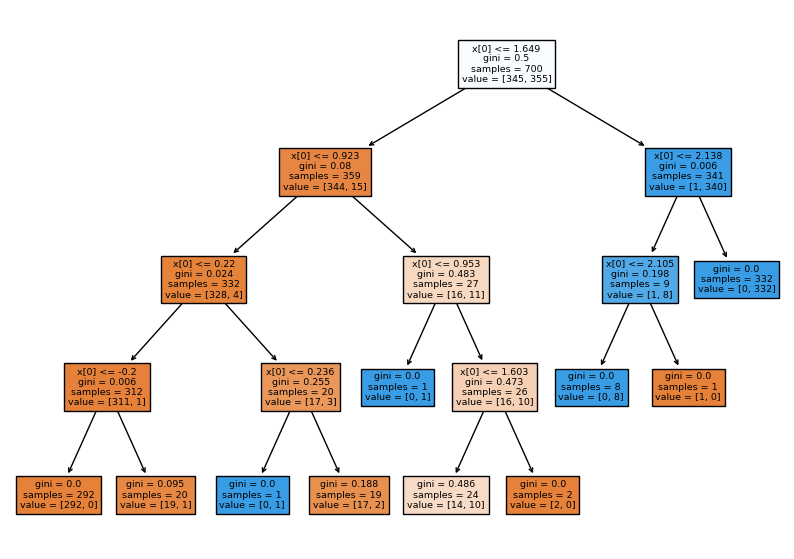

In [26]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train, y_train)

preds_tree = model_tree.predict(X_test) 



accuracy_score(preds_tree,y_test)

## Grafica del problema

from sklearn import tree

plt.figure(figsize = (10,7))
tree.plot_tree(model_tree, filled = True)
plt.show()

## Importacion de features (en este caso no sirve solo hay una caracteristica)

# plt.figure(figsize = (8,5))

# importances = model_tree.feature_importances_
# columns = X.columns
# sns.barplot(x = columns, y = importances)
# plt.title('Importancia de cada feature', fontsize = 15)
# plt.show()
